<a href="https://colab.research.google.com/github/mohitrajparit/dsML/blob/main/DL_03_face_recoginiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import cv2 as cv
import os
import dlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from google.colab.patches import cv2_imshow

In [10]:
data=os.listdir('.')
data=data[1:]
data.pop()
data

['person.2.24.jpg',
 'person.1.14.jpg',
 'person.1.12.jpg',
 'person.2.25.jpg',
 'person.1.2.jpg',
 'person.2.14.jpg',
 'person.2.6.jpg',
 'person.2.22.jpg',
 'person.1.24.jpg',
 'person.2.18.jpg',
 'person.2.21.jpg',
 'person.1.8.jpg',
 'person.1.19.jpg',
 'person.1.25.jpg',
 'person.2.8.jpg',
 'person.2.4.jpg',
 'person.2.19.jpg',
 'person.2.3.jpg',
 'person.1.13.jpg',
 'person.2.16.jpg',
 'person.2.23.jpg',
 'person.2.13.jpg',
 'person.2.17.jpg',
 'person.1.18.jpg',
 'person.1.16.jpg',
 'person.2.11.jpg',
 'person.1.21.jpg',
 'person.1.4.jpg',
 'person.1.7.jpg',
 'person.1.1.jpg',
 'person.2.10.jpg',
 'person.2.2.jpg',
 'person.1.20.jpg',
 'person.2.5.jpg',
 'person.1.9.jpg',
 'person.2.15.jpg',
 'person.2.7.jpg',
 'person.1.3.jpg',
 'person.1.22.jpg',
 'person.2.12.jpg',
 'person.1.5.jpg',
 'person.1.17.jpg',
 'person.2.20.jpg',
 'person.1.11.jpg',
 'person.1.10.jpg',
 'person.2.9.jpg',
 'person.1.15.jpg',
 'person.1.23.jpg',
 'person.1.6.jpg',
 'person.2.1.jpg']

In [15]:
def get_image_data():
  faces=[]
  ids=[]
  for path in data:
    image=Image.open(path)
    image=np.array(image,'uint8')
    faces.append(image)
    id=int(os.path.split(path)[-1].split('.')[1])
    ids.append(id)
  return faces,np.array(ids)

In [16]:
faces,id=get_image_data()
faces,id

([array([[ 64,  47,  33, ...,  66,  67,  67],
         [ 51,  39,  30, ...,  68,  70,  70],
         [ 35,  30,  27, ...,  68,  72,  73],
         ...,
         [112, 113, 114, ..., 144, 144, 144],
         [111, 112, 113, ..., 144, 144, 144],
         [111, 112, 112, ..., 143, 144, 144]], dtype=uint8),
  array([[ 25,  25,  25, ..., 100,  99, 101],
         [ 25,  25,  26, ..., 111, 105, 103],
         [ 24,  25,  26, ..., 111, 108, 107],
         ...,
         [ 26,  26,  29, ..., 104, 142, 102],
         [ 25,  25,  29, ..., 110, 139,  94],
         [ 25,  25,  28, ..., 114, 137,  89]], dtype=uint8),
  array([[ 19,  19,  20, ...,  93,  95,  97],
         [ 20,  20,  21, ...,  95,  96,  98],
         [ 20,  21,  22, ...,  97,  98,  99],
         ...,
         [ 22,  22,  23, ...,  40,  65, 127],
         [ 21,  20,  22, ...,  33,  57, 110],
         [ 20,  20,  22, ...,  26,  46,  90]], dtype=uint8),
  array([[ 22,  20,  21, ...,  97, 103, 114],
         [ 20,  19,  20, ...,  97, 104,

In [18]:
lbph_classifier=cv.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces,id)
lbph_classifier.write('lbph_classifier.yml')

In [19]:
lbph_face_classifier=cv.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

In [20]:
image=Image.open('person.1.1.jpg')
image.size

(220, 220)

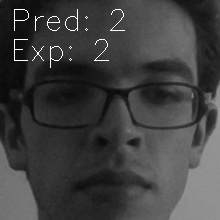

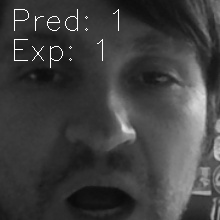

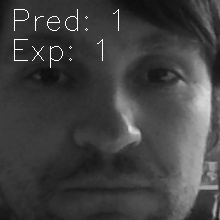

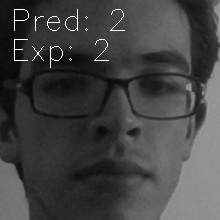

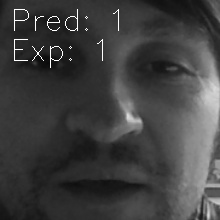

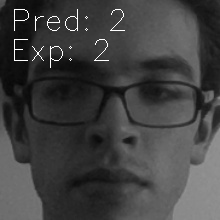

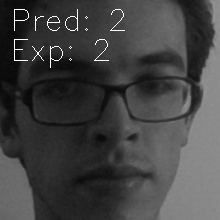

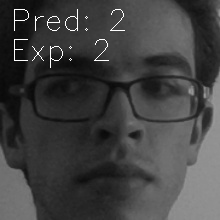

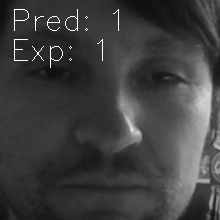

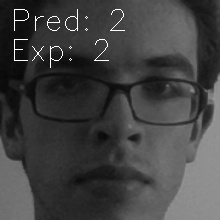

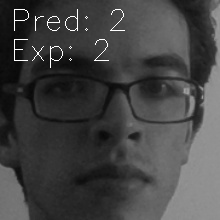

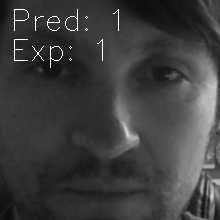

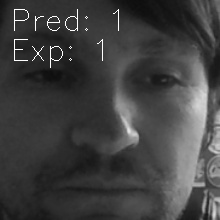

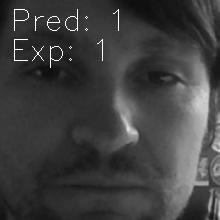

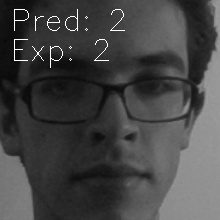

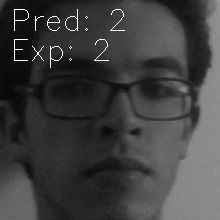

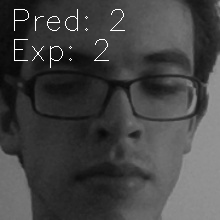

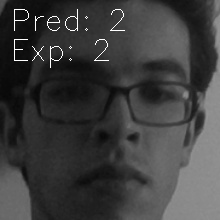

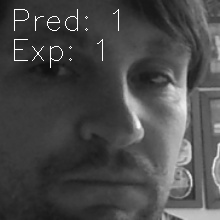

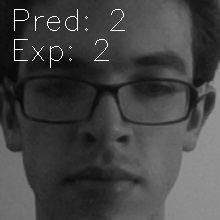

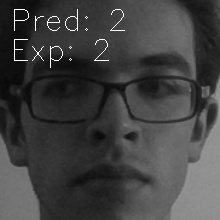

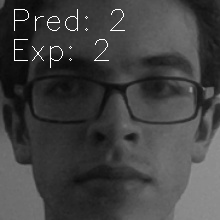

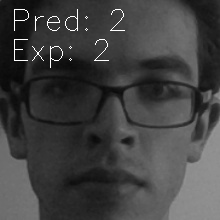

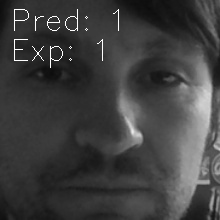

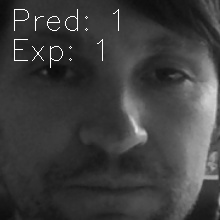

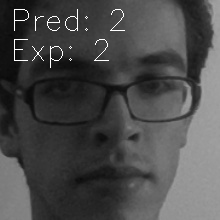

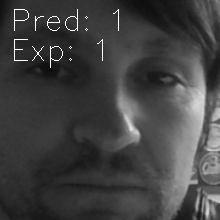

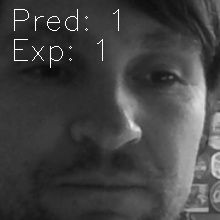

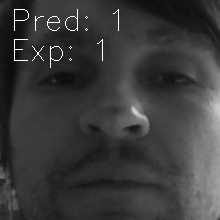

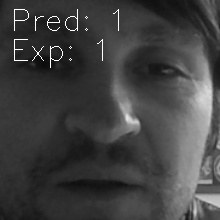

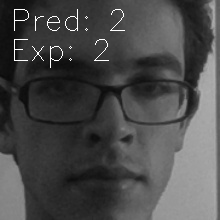

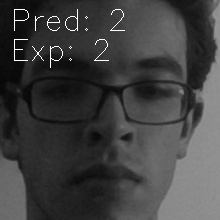

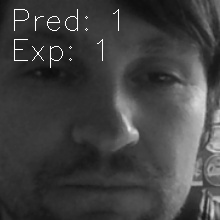

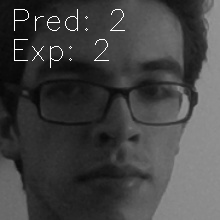

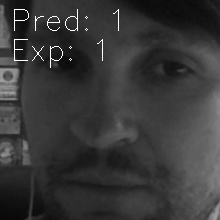

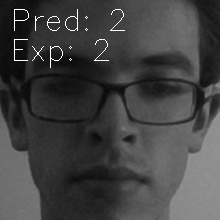

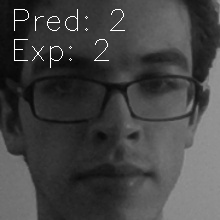

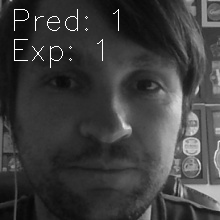

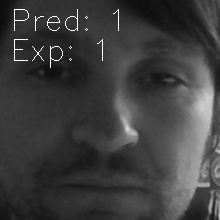

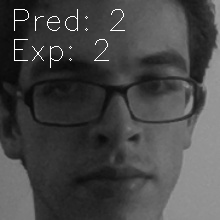

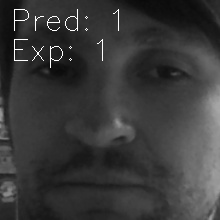

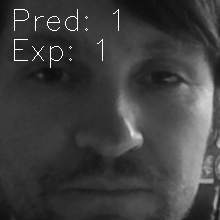

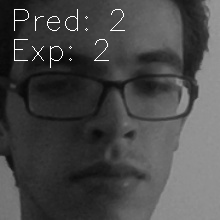

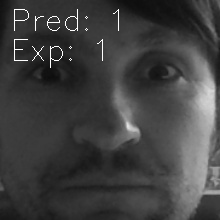

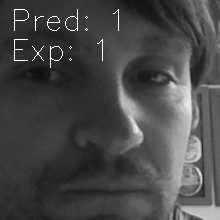

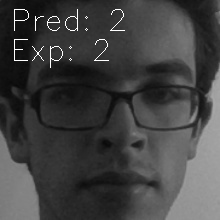

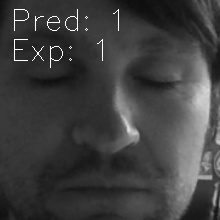

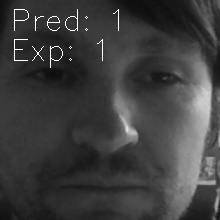

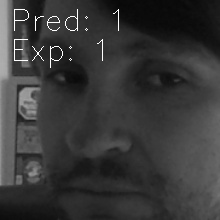

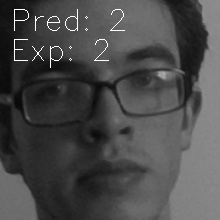

In [28]:
predictions=[]
expectations=[]
for path in data:
  image=Image.open(path)
  image=np.array(image,'uint8')
  id,confidence=lbph_face_classifier.predict(image)
  # print(id,confidence)
  expected_id=int(os.path.split(path)[-1].split('.')[1])
  # if id==expected_id:
  #   print('Correct')
  # else:
  #   print('Incorrect')
  predictions.append(id)
  expectations.append(expected_id)
  cv.putText(image,"Pred: "+str(id),(10,30),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0))
  cv.putText(image,"Exp: "+str(expected_id),(10,60),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0))
  cv2_imshow(image)
  cv.waitKey(0)

In [31]:
predictions=np.array(predictions)
expectations=np.array(expectations)
predictions,expectations

(array([2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
        1, 2, 1, 1, 1, 2]),
 array([2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
        1, 2, 1, 1, 1, 2]))

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,expectations)

1.0